# Stochastic gene expression in Fluctuating Environments
**Code Repository**

## *Stochastic Gene Expression in Fluctuating Environments* replica

We replicated the dynamics of the stochastic bacterial population represented on Figure 1. This figure is formed by 3 parts:

<center><a href="https://drive.google.com/file/d/1ErOUbBz1SbyGmIM9_0_DIL15S7uSFsGO/view" align="center"> <img src="https://drive.google.com/drive-viewer/AKGpihY0yxyT-cNlpKokxVPVtNaNBsprdG9HnGpbpb4xfdODHQkFQJseMVWoWLtS8lRoM6PVaKHBRVBeEnYeVcyfj3K7xz2moR_BRkg=s1600-rw-v1" height="250px"/> </a></center>

(A) Each cell can be in one of two states, $c_a$ and $c_b$; correspondingly, the environment can switch between two states $e_a$ and $e_b$. In environmental state $e_a$, cell state $c_a$ is the ﬁt state, labeled $c_1$ (open box), and cell state cb is the unﬁt state, labeled $c_0$ (shaded box); when the environmental state ﬂips, the two cell states exchange their properties. The growth rate of the ﬁt state is $\gamma_1$, and that of the unﬁt state is $\gamma_0 < \gamma_1$; Poisson transitions into the ﬁt state occur with rate $k_1$, and those into the unﬁt state occur with rate $k_0$. Typically, bacteria will tend to transition into the ﬁt state, so $k_1$ will usually be higher than $k_0$.

<center><a href="https://drive.google.com/file/d/17NlhuDzO0cbfCQKk05spPxCTgrzKyD--/view" align="center"> <img src="https://drive.google.com/drive-viewer/AKGpihbTpQcjHws_CrfLEhLCzjOduXCz3-Zf66sAQyTgz_mm7OgUa67kmgCYBKgIvtsLOCg_rXMJ0CtqxZ6O-47K2FSxEAmShvUqymA=s1600-rw-v1" height="300px"/> </a></center>

(B) Growth in a periodic environment. The environment cycles between the two states, spending a time $T = 1$ in each state. The fraction $f_1$ of cells in the ﬁt state is plotted as a function of time, as predicted by Equation 4, for $k_0 = 0.5$, $k_1 = 1.0$, $\Delta\gamma = 1.0$. While the environment is ﬁxed, more cells tend to transition into than out of the ﬁt state, so $f_1$ increases. When the environment ﬂips, cells that were in the ﬁt state now ﬁnd themselves in the unﬁt state, so $f_1\rightarrow(1 - f_1)$. After this event, cells again begin to switch into the newly ﬁt state, and so on.

<center><a href="https://drive.google.com/file/d/1_CqdvukrYmjRAi3l0GAKeKrONb8YpJbT/view" align="center"> <img src="https://drive.google.com/drive-viewer/AKGpihZJI1slqzVKvjGhbJcc-Ecza2SvUe3IO9phU-EvU5coq091-9RtRwBXXuV7GdCwIivu0Vs2mYPuxHBmElgK8Vgay8VqoLEi8w=s1600-rw-v1" height="300px"/> </a></center>

(C) Growth in a stochastic environment. The time spent by the environment in a given state is now exponentially distributed, with mean value $T$; this results in several brief environmental epochs, interspersed with a few periods in which the environment is more persistent. We generated the time course shown using a Monte Carlo simulation, then used Equation 4 to determine the time evolution of $f_1$, for the same parameter values as in Figure 1B. We see that cells are able to attain much higher ﬁtness values during the extended environmental periods than in a periodic environment.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

In [ ]:
# Base parameters
k1_base = 1.0  # Transition rate to the fit state
k0_base = 0.5  # Transition rate to the unfit state
gamma_1 = 0.15  # Growth rate in a favorable environment
gamma_0 = 0.05  # Growth rate in an unfavorable environment

# Environment switching parameters
T_mean = 1  # Mean time in each state for the stochastic environment
T_std = 0.8  # Standard deviation of time in each state
periods = []  # Initialize periods

# Simulation duration
t_end = 10 # Choose how long the simulation should run
step_size = 0.01 # Choose how much time is expected to elapse between steps
decimal_precision = len(str(step_size).split(".")[1])  # Determine the decimal precision of the step size
t_eval = np.arange(0, t_end + step_size, step_size).round(2)

# Initial conditions
n_a_0, n_b_0 = 40, 55

# DEFINE MAIN FUNCTIONS

# Function to determine the environment state
def environment_state(t, step_size=0.01):
    if environment_type == 'periodic':
        state = (t // T_mean) % 2
        return state
    elif environment_type == 'stochastic':
        global periods
        if not periods:  # Initialize the values for the different periods
            periods.append(0)
            while sum(periods) < t_end:
                periods.append(np.abs(np.random.normal(T_mean, T_std)))

        cum_periods = np.cumsum(periods)
        cum_periods = np.round(np.round(cum_periods/step_size)*step_size,decimal_precision)
        cum_periods = np.round(cum_periods*(10**decimal_precision)).astype(int)
        t = np.round(t*(10**decimal_precision)).astype(int)

        if type(t) != np.ndarray:
            state = (np.where(cum_periods > t)[0][0] + 1) % 2
            return state
        else:
            t_states = np.zeros_like(t)
            for i in range(2, len(cum_periods), 2):
                start = np.where(t == cum_periods[i - 1])[0][0]
                if i == len(cum_periods) - 1:
                    end = len(t)
                else:
                    end = np.where(t == cum_periods[i])[0][0]
                t_states[start:end] = 1
            return t_states

# System of differential equations with fluctuating environment
def population_dynamics(t, y):
    n_a, n_b = y

    # Determine the environment state at time t
    state = environment_state(t)

    # Assign growth and transition rates based on the environment
    if state == 1:  # Favorable state for C_B
        gamma_a, gamma_b = gamma_1, gamma_0
        k1, k0 = k1_base, k0_base
    else:  # Favorable state for C_A
        gamma_a, gamma_b = gamma_0, gamma_1
        k1, k0 = k0_base, k1_base

    # Differential equations
    dn_a_dt = gamma_a * n_a - k1 * n_a + k0 * n_b
    dn_b_dt = gamma_b * n_b + k1 * n_a - k0 * n_b

    return [dn_a_dt, dn_b_dt]

def EulerMethod(dt,t_eval,n_a_0,n_b_0,population_dynamics_function):
    n_a = [n_a_0]
    n_b = [n_b_0]

    for i in range(len(t_eval)-1):
        dn_a_dt, dn_b_dt = population_dynamics_function(t_eval[i], [n_a[-1], n_b[-1]])
        n_a.append(n_a[-1] + dn_a_dt * dt)
        n_b.append(n_b[-1] + dn_b_dt * dt)
    return n_a, n_b

def plot_figure(t_eval, data_final, t_state, data_fa, data_fb, title=None, show=True, method="Euler's method", colored=True):
  changes = np.abs(np.diff(t_state))
  changes_index = np.where(changes == 1)[0] + 1
  changes_index = np.concatenate(([0],changes_index))

  fig, ax = plt.subplots(3, 1, figsize=(8, 7.5))
  plt.subplot(3, 1, 1)
  nl = '\n'
  plt.text(-0.13, 1.55, f"{nl}$e_b$ {nl}", bbox=dict(boxstyle="square", fc="w", ec="k"),
           size="large",
           horizontalalignment="right", verticalalignment="top")
  plt.text(-0.13, .45, f"{nl}$e_a${nl}", bbox=dict(boxstyle="square", fc="w", ec="k"),
           size="large",
           horizontalalignment="right", verticalalignment="top")
  plt.plot(t_eval, t_state, color="k")

  plt.ylim([-1, 2])
  plt.box(False)
  plt.yticks([])
  plt.xticks([])
  for i,_ in enumerate(changes_index):
    if i > 0:
      plt.axvline(x=t_eval[changes_index[i]], ymin=-1.2, ymax=0.6, c="k", linestyle=":", alpha=0.3, zorder=-10, clip_on=False)


  plt.subplot(3, 1, 2)
  plt.plot(t_eval, data_final, label="Fittest population fraction", color="k")
  plt.ylabel("Population")
  plt.legend()
  for i,_ in enumerate(changes_index):
    if i > 0:
      # plt.vlines(x=t_eval[changes_index[i]], ymin=0, ymax=1, color="k", linestyle=":")
      plt.axvline(x=t_eval[changes_index[i]], ymin=-1.2, ymax=1, c="k", linestyle=":", alpha=0.3, zorder=-10, clip_on=False)
    if colored:
      if _<changes_index[-1]:
        if i % 2 == 0:
          plt.plot(t_eval[changes_index[i]+1:changes_index[i+1]], data_fa[changes_index[i]+1:changes_index[i+1]], color="forestgreen")

        else:
          plt.plot(t_eval[changes_index[i]+1:changes_index[i+1]], data_fb[changes_index[i]+1:changes_index[i+1]], color="darkorchid")
      else: # Last iteration
        if i % 2 == 0:
          plt.plot(t_eval[changes_index[-1]:len(t_eval)-1], data_fa[changes_index[-1]:len(t_eval)-1], color="forestgreen")
        else:
          plt.plot(t_eval[changes_index[-1]:len(t_eval)-1], data_fb[changes_index[-1]:len(t_eval)-1], color="darkorchid")


  plt.title(f"Environment: {environment_type} - {method}")
  plt.ylim([0, 1])

  plt.subplot(3, 1, 3)
  plt.plot(t_eval, data_fa, label="$c_a$ fraction", color="forestgreen")
  plt.plot(t_eval, data_fb, label="$c_b$ fraction", color="darkorchid")
  plt.xlabel("Time")
  plt.ylabel("Population")
  plt.ylim([0, 1])
  plt.legend()

  for i,_ in enumerate(changes_index):
    if i > 0:
      plt.axvline(x=t_eval[changes_index[i]], ymin=0, ymax=1.2, c="k", linestyle=":", alpha=0.3, zorder=-10, clip_on=False)

  plt.suptitle(title, y=0.875)

  if show:
    plt.show()
  else:
    return fig

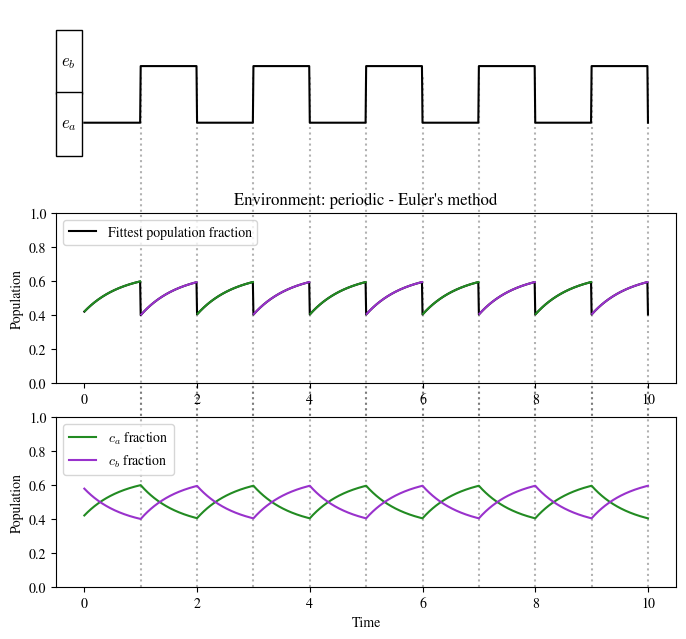

In [ ]:
# Periodic simulation
periods = []  # Initialize periods

environment_type = 'periodic'

t_state_periodic = environment_state(t_eval)

n_a_per, n_b_per = EulerMethod(step_size,t_eval,n_a_0,n_b_0,population_dynamics)

data_fa_periodic = np.array(n_a_per) / (np.array(n_a_per) + np.array(n_b_per))
data_fb_periodic = np.array(n_b_per) / (np.array(n_a_per) + np.array(n_b_per))

data_final_periodic = np.zeros_like(data_fa_periodic)
data_final_periodic[t_state_periodic == 0] = data_fa_periodic[t_state_periodic == 0]
data_final_periodic[t_state_periodic == 1] = data_fb_periodic[t_state_periodic == 1]

plot_figure(t_eval, data_final_periodic, t_state_periodic, data_fa_periodic, data_fb_periodic)

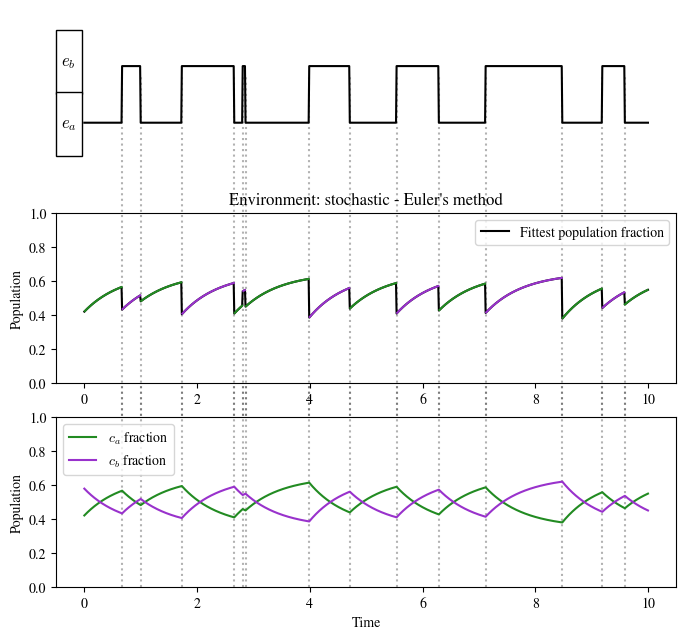

In [ ]:
# Stochastic simulation
periods = []  # Initialize periods
np.random.seed(2105)

environment_type = 'stochastic'

t_state_stochastic = environment_state(t_eval)

n_a_sto, n_b_sto = EulerMethod(step_size,t_eval,n_a_0,n_b_0,population_dynamics)

data_fa_stochastic = np.array(n_a_sto) / (np.array(n_a_sto) + np.array(n_b_sto))
data_fb_stochastic = np.array(n_b_sto) / (np.array(n_a_sto) + np.array(n_b_sto))

data_final_stochastic = np.zeros_like(data_fa_stochastic)
data_final_stochastic[t_state_stochastic == 0] = data_fa_stochastic[t_state_stochastic == 0]
data_final_stochastic[t_state_stochastic == 1] = data_fb_stochastic[t_state_stochastic == 1]

plot_figure(t_eval, data_final_stochastic, t_state_stochastic, data_fa_stochastic, data_fb_stochastic)

### Comparison between periodic and stochastic

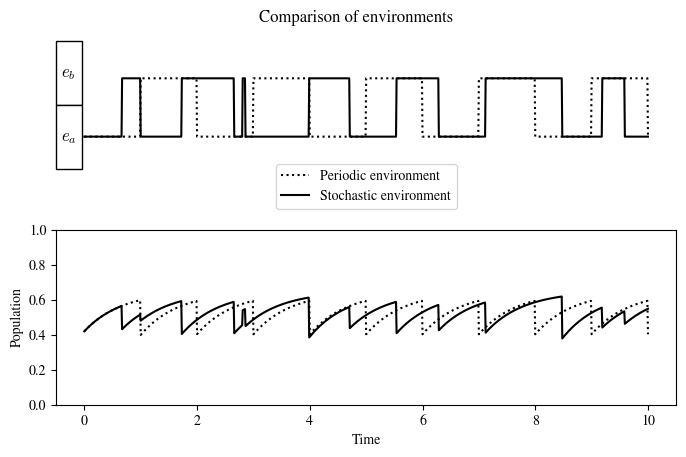

In [ ]:
def plot_comparison(t_eval, data_final_periodic, t_state_periodic,
                    data_final_stochastic, t_state_stochastic):
  plt.figure(figsize=(8, 5))
  plt.subplot(2, 1, 1)
  nl = '\n'
  plt.text(-0.13, 1.55, f"{nl}$e_b$ {nl}", bbox=dict(boxstyle="square", fc="w", ec="k"),
           size="large",
           horizontalalignment="right", verticalalignment="top")
  plt.text(-0.13, .45, f"{nl}$e_a${nl}", bbox=dict(boxstyle="square", fc="w", ec="k"),
           size="large",
           horizontalalignment="right", verticalalignment="top")
  plt.plot(t_eval, t_state_periodic, color="k", linestyle=":")
  plt.plot(t_eval, t_state_stochastic, color="k", linestyle="-")
  plt.ylim([-1, 2])
  plt.box(False)
  plt.yticks([])
  plt.xticks([])

  plt.subplot(2, 1, 2)
  plt.plot(t_eval, data_final_periodic, label="Periodic environment", color="k", linestyle=":")
  plt.plot(t_eval, data_final_stochastic, label="Stochastic environment", color="k", linestyle="-")
  # plt.hlines(y=np.max(data_final_periodic), xmin=t_eval[0] , xmax=t_eval[-1], color="k", linestyle=":", alpha=0.3)
  # plt.hlines(y=np.max(data_final_stochastic), xmin=t_eval[0] , xmax=t_eval[-1], color="k", linestyle="-", alpha=0.3)
  plt.xlabel("Time")
  plt.ylabel("Population")
  plt.legend(loc="center",bbox_to_anchor=(0.5, 1.25))
  plt.ylim([0, 1])

  plt.suptitle("Comparison of environments", y=0.9)
  plt.show()

plot_comparison(t_eval, data_final_periodic, t_state_periodic, data_final_stochastic, t_state_stochastic)

## Our proposal: Different Solvers
Explain why it is important and how we discovered it

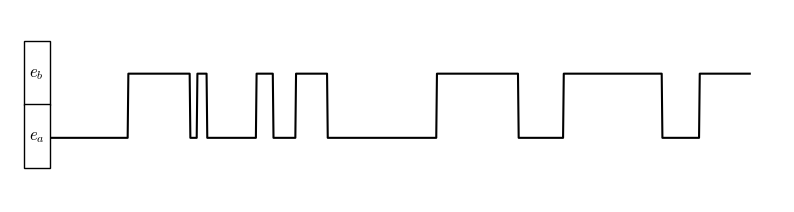

In [ ]:
environment_type = 'stochastic'

np.random.seed(212)

periods_bad = []
periods_bad.append(0)
while sum(periods_bad) < t_end:
    periods_bad.append(np.abs(np.random.normal(T_mean, T_std)))

cum_periods = np.cumsum(periods_bad)
cum_periods = np.round(np.round(cum_periods/step_size)*step_size,decimal_precision)
cum_periods = np.round(cum_periods*(10**decimal_precision)).astype(int)
t = t_eval
t = np.round(t*(10**decimal_precision)).astype(int)

t_state_bad = np.zeros_like(t)
for i in range(2, len(cum_periods), 2):
    start = np.where(t == cum_periods[i - 1])[0][0]
    if i == len(cum_periods) - 1:
        end = len(t)
    else:
        end = np.where(t == cum_periods[i])[0][0]
    t_state_bad[start:end] = 1

plt.figure(figsize=(10, 2.5))

nl = '\n'
plt.text(-0.01, 1.425, f"{nl}$e_b ${nl}", bbox=dict(boxstyle="square", fc="w", ec="k"),
        size="large",
        horizontalalignment="right", verticalalignment="top")
plt.text(-0.01, .45, f"{nl}$e_a${nl}", bbox=dict(boxstyle="square", fc="w", ec="k"),
        size="large",
        horizontalalignment="right", verticalalignment="top")
plt.plot(t_eval, t_state_bad, color="k")
plt.ylim([-1,2])
plt.box(False)
plt.yticks([])
plt.xticks([])
plt.show()

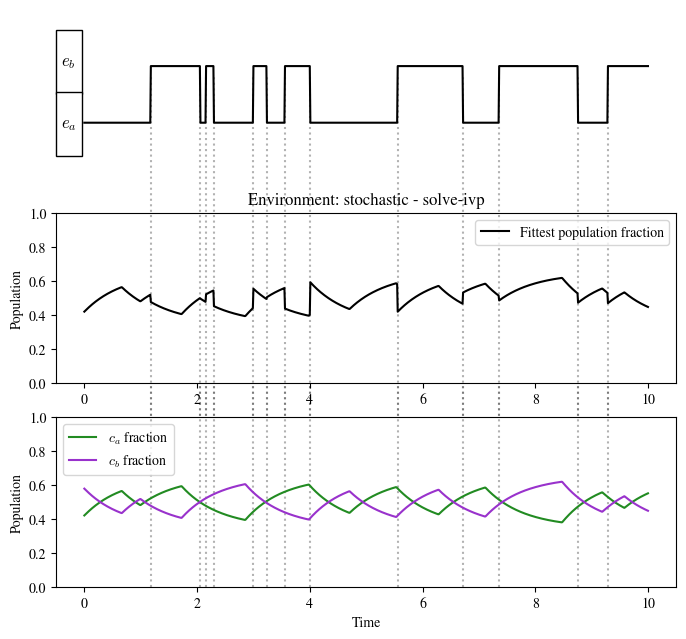

In [ ]:
from scipy.integrate import solve_ivp

solution = solve_ivp(population_dynamics, (0, t_end), [n_a_0, n_b_0], t_eval=t_eval, method='LSODA')

data_f0 = solution.y[0]/(solution.y[0] + solution.y[1])
data_f1 = solution.y[1]/(solution.y[0] + solution.y[1])
data_final = np.zeros_like(data_f0)
data_final[t_state_bad == 0] = data_f0[t_state_bad == 0]
data_final[t_state_bad == 1] = data_f1[t_state_bad == 1]

plot_figure(t_eval, data_final, t_state_bad, data_f0, data_f1, method = "solve-ivp", colored=False)


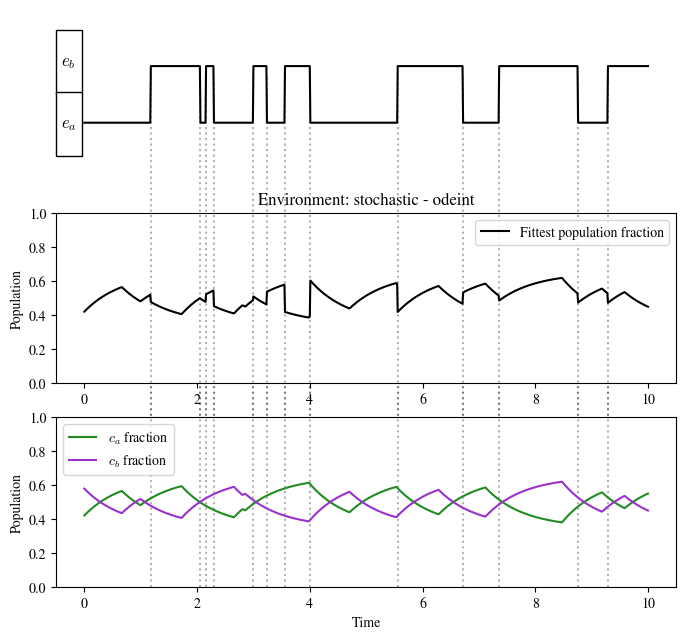

In [ ]:
from scipy.integrate import odeint

def population_dynamics_flipped(y, t):
    n_a, n_b = y

    # Determine the environment state at time t
    state = environment_state(t)

    # Assign growth and transition rates based on the environment
    if state == 1:  # Favorable state for C_B
        gamma_a, gamma_b = gamma_1, gamma_0
        k1, k0 = k1_base, k0_base
    else:  # Favorable state for C_A
        gamma_a, gamma_b = gamma_0, gamma_1
        k1, k0 = k0_base, k1_base

    # Differential equations
    dn_a_dt = gamma_a * n_a - k1 * n_a + k0 * n_b
    dn_b_dt = gamma_b * n_b + k1 * n_a - k0 * n_b

    return [dn_a_dt, dn_b_dt]


solution = odeint(population_dynamics_flipped, [n_a_0, n_b_0], t_eval)

data_f0 = solution[:, 0]/(solution[:, 0]+solution[:, 1])
data_f1 = solution[:, 1]/(solution[:, 0]+solution[:, 1])

data_final = np.zeros_like(data_f0)
data_final[t_state_bad == 0] = data_f0[t_state_bad == 0]
data_final[t_state_bad == 1] = data_f1[t_state_bad == 1]

plot_figure(t_eval, data_final, t_state_bad, data_f0, data_f1, method = "odeint", colored=False)

## Our proposal: Logistic function in our model
The first model proposed by the authors of this paper uses a constitutive growth expression to model how bacteria grow in this type of environment, since this is not accurately precise in a biological context with what happens in reality we decided to implement a logistic function to model the bacterial growth on a media with limited resources

In [ ]:
k1_base = 1.0  # Transition rate to the fit state
k0_base = 0.5  # Transition rate to the unfit state
gamma_1 = 0.35  # Growth rate in a favorable environment
gamma_0 = 0.25  # Growth rate in an unfavorable environment

k1_base = 1.0  # Transition rate to the fit state
k0_base = 0.5  # Transition rate to the unfit state
gamma_1 = 0.35  # Growth rate in a favorable environment
gamma_0 = 0.25  # Growth rate in an unfavorable environment

gamma_1_log = 0.673 # Growth rate in a favorable environment for logistic
gamma_0_log = 0.358  # Growth rate in an unfavorable environment
K_a, K_b = 50, 50  # Carrying capacities for favorable state
decay_rate = 0.05  # Decay rate

# Initial conditions
n_a_0, n_b_0 = 20, 25

# Logistic growth-based dynamics
def population_dynamics_Logistic(t, y):
    n_a, n_b = y

    # Determine the environment state at time t
    state = environment_state(t)

    # Assign growth rates and state transition rates based on the environment
    if state == 1: # Favorable state for C_B
        r_a, r_b = gamma_1_log, gamma_0_log
        k1, k0 = k1_base, k0_base
    else: # Favorable state for C_A
        r_a, r_b = gamma_0_log, gamma_1_log
        k1, k0 = k0_base, k1_base

    # Logistic growth rates
    growth_rate_a = r_a * n_a * (1 - (n_a / K_a)**2)
    growth_rate_b = r_b * n_b * (1 - (n_b / K_b)**2)

    # Differential equations with decay
    dn_a_dt = growth_rate_a - k1 * n_a + k0 * n_b - decay_rate * n_a
    dn_b_dt = growth_rate_b + k1 * n_a - k0 * n_b - decay_rate * n_b

    return [dn_a_dt, dn_b_dt]

In [ ]:
# Repeat Constitutive expression simulations with adjusted parameters
environment_type = 'periodic'

n_a_per_adj, n_b_per_adj = EulerMethod(step_size,t_eval,n_a_0,n_b_0,population_dynamics)

data_fa_periodic_adj = np.array(n_a_per_adj) / (np.array(n_a_per_adj) + np.array(n_b_per_adj))
data_fb_periodic_adj = np.array(n_b_per_adj) / (np.array(n_a_per_adj) + np.array(n_b_per_adj))

data_final_periodic_adj = np.zeros_like(data_fa_periodic_adj)
data_final_periodic_adj[t_state_periodic == 0] = data_fa_periodic_adj[t_state_periodic == 0]
data_final_periodic_adj[t_state_periodic == 1] = data_fb_periodic_adj[t_state_periodic == 1]

environment_type = 'stochastic'
n_a_sto_adj, n_b_sto_adj = EulerMethod(step_size,t_eval,n_a_0,n_b_0,population_dynamics)

data_fa_stochastic_adj = np.array(n_a_sto_adj) / (np.array(n_a_sto_adj) + np.array(n_b_sto_adj))
data_fb_stochastic_adj = np.array(n_b_sto_adj) / (np.array(n_a_sto_adj) + np.array(n_b_sto_adj))

data_final_stochastic_adj = np.zeros_like(data_fa_stochastic_adj)
data_final_stochastic_adj[t_state_stochastic == 0] = data_fa_stochastic_adj[t_state_stochastic == 0]
data_final_stochastic_adj[t_state_stochastic == 1] = data_fb_stochastic_adj[t_state_stochastic == 1]


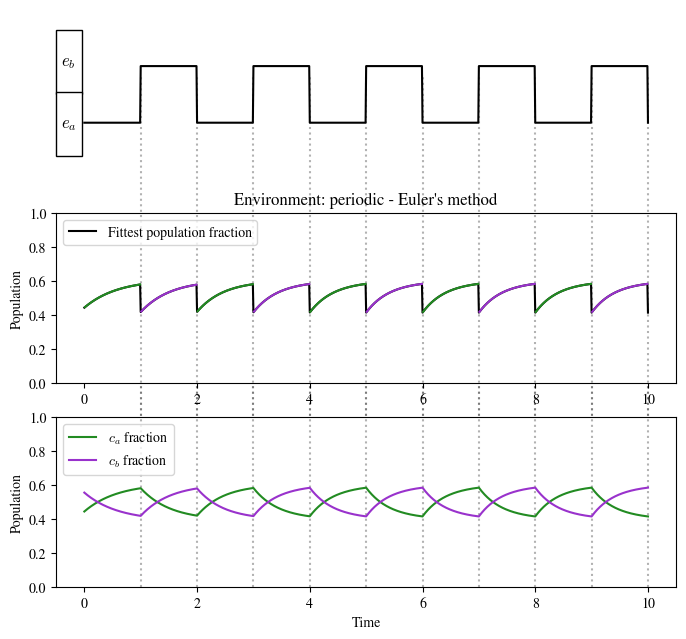

In [ ]:
# Periodic simulation

environment_type = 'periodic'

n_a_per_log, n_b_per_log = EulerMethod(step_size, t_eval, n_a_0, n_b_0, population_dynamics_Logistic)

data_fa_periodic_log = np.array(n_a_per_log) / (np.array(n_a_per_log) + np.array(n_b_per_log))
data_fb_periodic_log = np.array(n_b_per_log) / (np.array(n_a_per_log) + np.array(n_b_per_log))

data_final_periodic_log = np.zeros_like(data_fa_periodic_log)
data_final_periodic_log[t_state_periodic == 0] = data_fa_periodic_log[t_state_periodic == 0]
data_final_periodic_log[t_state_periodic == 1] = data_fb_periodic_log[t_state_periodic == 1]

plot_figure(t_eval, data_final_periodic_log, t_state_periodic, data_fa_periodic_log, data_fb_periodic_log)

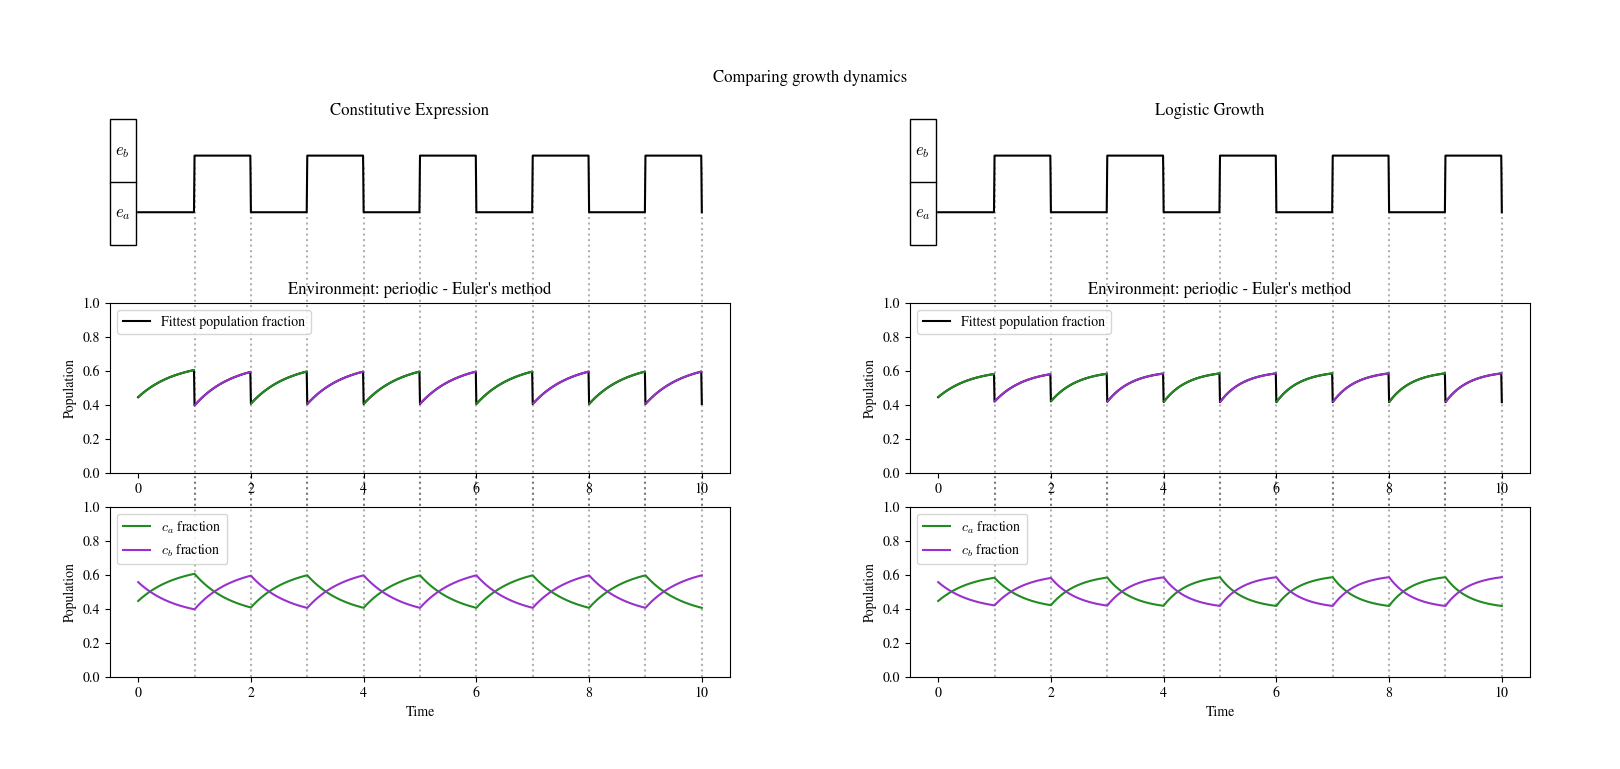

In [ ]:
import matplotlib as mpl

def plot_side_by_side(fig1, fig2, title=None):
  backend = mpl.get_backend()
  plt.close("all")
  mpl.use('agg')

  c1 = fig1.canvas
  c2 = fig2.canvas

  c1.draw()
  c2.draw()

  a1 = np.array(c1.buffer_rgba())
  a2 = np.array(c2.buffer_rgba())
  a = np.hstack((a1,a2))

  mpl.use(backend)
  fig,ax = plt.subplots(figsize=(16, 7.5))
  fig.subplots_adjust(0, 0, 1, 1)
  ax.set_axis_off()
  fig.suptitle(title, y=0.92)
  ax.matshow(a)


fig1 = plot_figure(t_eval, data_final_periodic_adj, t_state_periodic, data_fa_periodic_adj, data_fb_periodic_adj, show=False,title="Constitutive Expression")
fig2 = plot_figure(t_eval, data_final_periodic_log, t_state_periodic, data_fa_periodic_log, data_fb_periodic_log, show=False, title="Logistic Growth")

plot_side_by_side(fig1, fig2, title="Comparing growth dynamics")

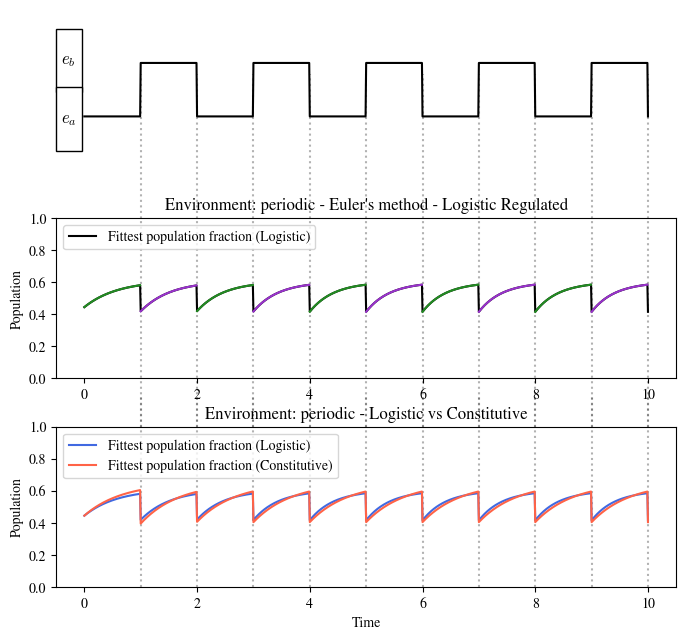

In [ ]:
def plot_figure_logistic_compare(t_eval, t_state, data_final, data_fa, data_fb,
                                 data_final_log, data_fa_log, data_fb_log, title=None, show=True):
  changes = np.abs(np.diff(t_state))
  changes_index = np.where(changes == 1)[0] + 1
  changes_index = np.concatenate(([0],changes_index))

  fig, ax = plt.subplots(3, 1, figsize=(8, 7.5))
  plt.subplot(3, 1, 1)
  nl = '\n'
  plt.text(-0.13, 1.55, f"{nl}$e_b$ {nl}", bbox=dict(boxstyle="square", fc="w", ec="k"),
           size="large",
           horizontalalignment="right", verticalalignment="top")
  plt.text(-0.13, .45, f"{nl}$e_a${nl}", bbox=dict(boxstyle="square", fc="w", ec="k"),
           size="large",
           horizontalalignment="right", verticalalignment="top")
  plt.plot(t_eval, t_state, color="k")

  plt.ylim([-1, 2])
  plt.box(False)
  plt.yticks([])
  plt.xticks([])
  for i,_ in enumerate(changes_index):
    if i > 0:
      plt.axvline(x=t_eval[changes_index[i]], ymin=-1.2, ymax=0.6, c="k", linestyle=":", alpha=0.3, zorder=-10, clip_on=False)


  plt.subplot(3, 1, 2)
  plt.plot(t_eval, data_final_log, label="Fittest population fraction (Logistic)", color="k")
  plt.ylabel("Population")
  plt.legend()
  for i,_ in enumerate(changes_index):
    if i > 0:
      plt.axvline(x=t_eval[changes_index[i]], ymin=-1.2, ymax=1, c="k", linestyle=":", alpha=0.3, zorder=-10, clip_on=False)
    if _<changes_index[-1]:
      if i % 2 == 0:
        plt.plot(t_eval[changes_index[i]:changes_index[i+1]], data_fa_log[changes_index[i]:changes_index[i+1]], color="forestgreen")

      else:
        plt.plot(t_eval[changes_index[i]:changes_index[i+1]], data_fb_log[changes_index[i]:changes_index[i+1]], color="darkorchid")
    else: # Last iteration
      if i % 2 == 0:
        plt.plot(t_eval[changes_index[-1]:len(t_eval)-1], data_fa_log[changes_index[-1]:len(t_eval)-1], color="forestgreen")
      else:
        plt.plot(t_eval[changes_index[-1]:len(t_eval)-1], data_fb_log[changes_index[-1]:len(t_eval)-1], color="darkorchid")

  plt.title(f"Environment: {environment_type} - Euler's method - Logistic Regulated")
  plt.ylim([0, 1])

  plt.subplot(3, 1, 3)
  plt.plot(t_eval, data_final_log, label="Fittest population fraction (Logistic)", color="royalblue")
  plt.plot(t_eval, data_final, label="Fittest population fraction (Constitutive)", color="tomato", linestyle="-")
  # plt.plot(t_eval, data_final, label="Fittest population fraction (Constitutive)", color="tomato", linestyle="--")
  plt.ylabel("Population")
  plt.xlabel("Time")
  plt.legend()
  for i,_ in enumerate(changes_index):
    if i > 0:
      plt.axvline(x=t_eval[changes_index[i]], ymin=0, ymax=1.2, c="k", linestyle=":", alpha=0.3, zorder=-10, clip_on=False)
    # if _<changes_index[-1]:
    #   if i % 2 == 0:
    #     plt.plot(t_eval[changes_index[i]:changes_index[i+1]], data_fa_log[changes_index[i]:changes_index[i+1]], color="forestgreen")
    #     plt.plot(t_eval[changes_index[i]:changes_index[i+1]], data_fa[changes_index[i]:changes_index[i+1]], color="forestgreen", linestyle="--")
    #   else:
    #     plt.plot(t_eval[changes_index[i]:changes_index[i+1]], data_fb_log[changes_index[i]:changes_index[i+1]], color="darkorchid")
    #     plt.plot(t_eval[changes_index[i]:changes_index[i+1]], data_fb[changes_index[i]:changes_index[i+1]], color="darkorchid", linestyle="--")
    # else: # Last iteration
    #   if i % 2 == 0:
    #     plt.plot(t_eval[changes_index[-1]:len(t_eval)-1], data_fa_log[changes_index[-1]:len(t_eval)-1], color="forestgreen")
    #     plt.plot(t_eval[changes_index[-1]:len(t_eval)-1], data_fa[changes_index[-1]:len(t_eval)-1], color="forestgreen", linestyle="--")
    #   else:
    #     plt.plot(t_eval[changes_index[-1]:len(t_eval)-1], data_fb_log[changes_index[-1]:len(t_eval)-1], color="darkorchid")
    #     plt.plot(t_eval[changes_index[-1]:len(t_eval)-1], data_fb[changes_index[-1]:len(t_eval)-1], color="darkorchid", linestyle="--")
  plt.title(f"Environment: {environment_type} - Logistic vs Constitutive")
  plt.ylim([0, 1])
  plt.subplots_adjust(hspace=0.3)
  if show:
    plt.show()

plot_figure_logistic_compare(t_eval, t_state_periodic, data_final_periodic_adj, data_fa_periodic_adj, data_fb_periodic_adj,
                                 data_final_periodic_log, data_fa_periodic_log, data_fb_periodic_log)


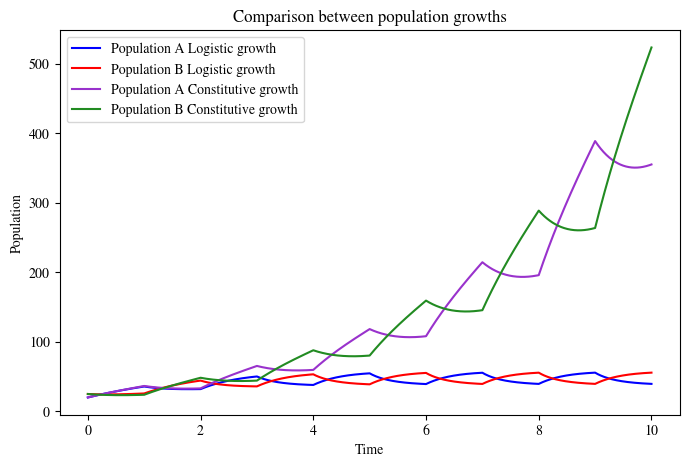

In [ ]:
def plot_comparison_Logistic(t_eval, n_a, n_b, n_a_log, n_b_log):
  plt.figure(figsize=(8,5))
  plt.plot(t_eval, n_a_log, label="Population A Logistic growth", color="blue")
  plt.plot(t_eval, n_b_log, label="Population B Logistic growth", color="red")
  plt.plot(t_eval, n_a, label="Population A Constitutive growth", color="darkorchid")
  plt.plot(t_eval, n_b, label="Population B Constitutive growth", color="forestgreen")
  plt.ylabel("Population")
  plt.xlabel("Time")
  plt.legend()
  plt.title(f"Comparison between population growths")
  plt.show()

plot_comparison_Logistic(t_eval, n_a_per_adj, n_b_per_adj, n_a_per_log, n_b_per_log)

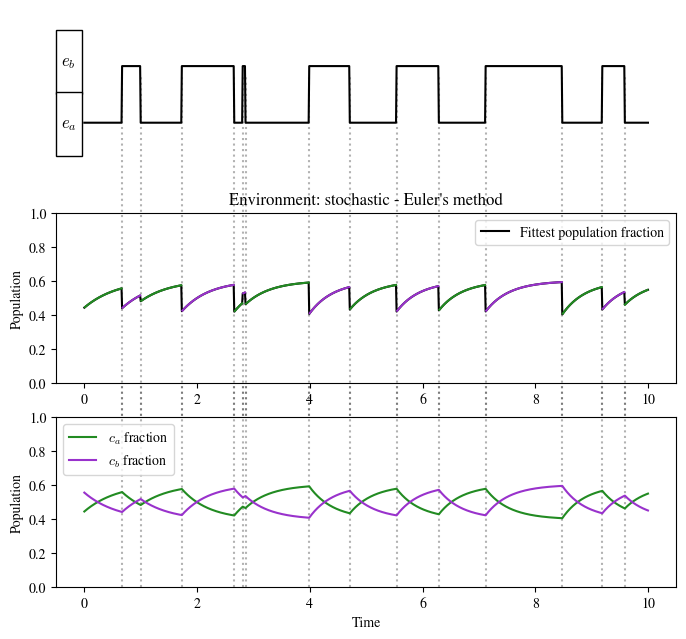

In [ ]:
# Stochastic simulation
environment_type = 'stochastic'

n_a_sto_log, n_b_sto_log = EulerMethod(step_size,t_eval,n_a_0,n_b_0,population_dynamics_Logistic)

data_fa_stochastic_log = np.array(n_a_sto_log) / (np.array(n_a_sto_log) + np.array(n_b_sto_log))
data_fb_stochastic_log = np.array(n_b_sto_log) / (np.array(n_a_sto_log) + np.array(n_b_sto_log))

data_final_stochastic_log = np.zeros_like(data_fa_stochastic_log)
data_final_stochastic_log[t_state_stochastic == 0] = data_fa_stochastic_log[t_state_stochastic == 0]
data_final_stochastic_log[t_state_stochastic == 1] = data_fb_stochastic_log[t_state_stochastic == 1]

plot_figure(t_eval, data_final_stochastic_log, t_state_stochastic, data_fa_stochastic_log, data_fb_stochastic_log)

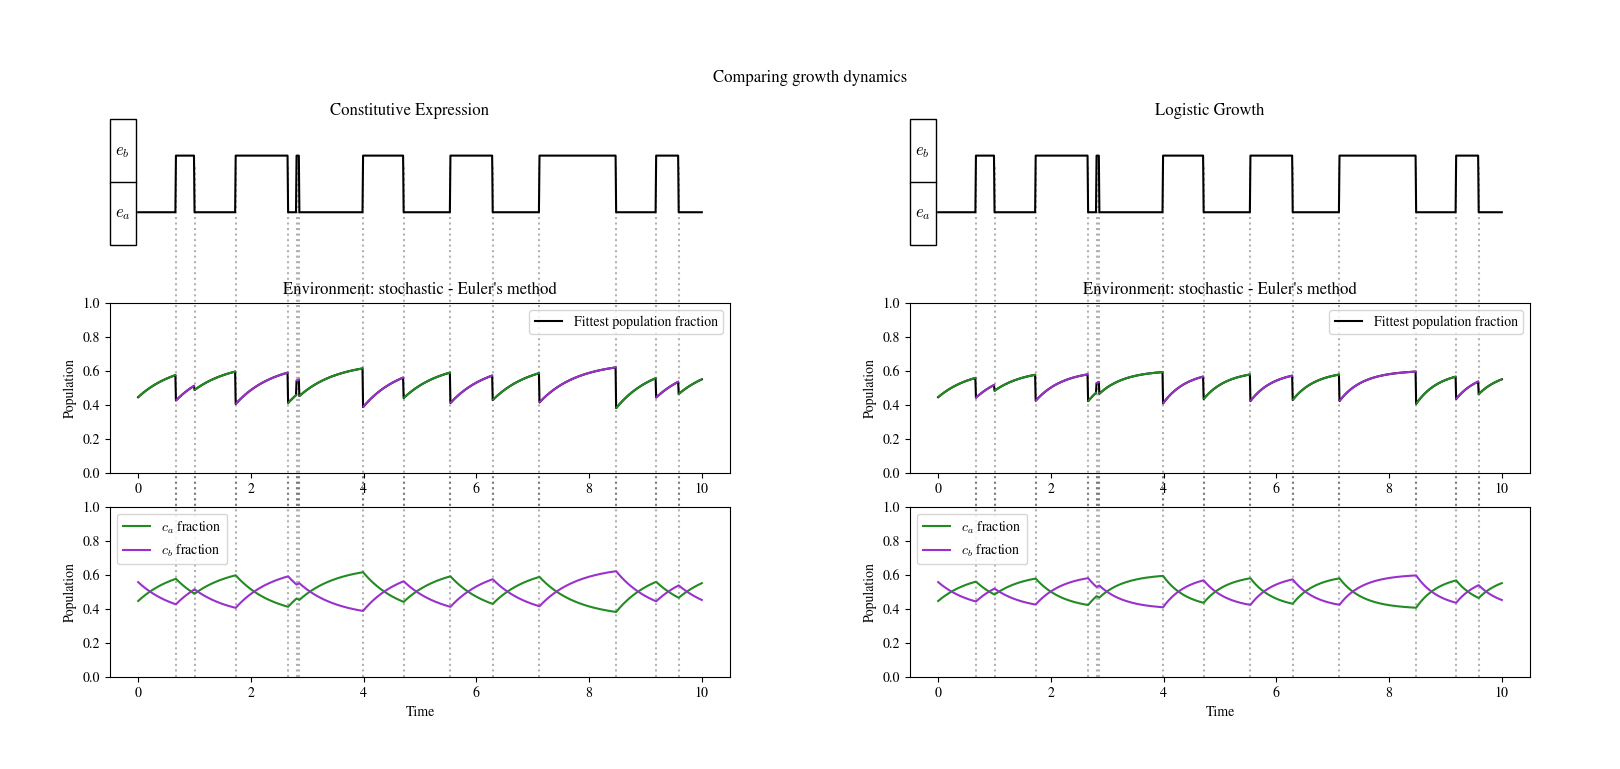

In [ ]:
fig1 = plot_figure(t_eval, data_final_stochastic_adj, t_state_stochastic, data_fa_stochastic_adj, data_fb_stochastic_adj, show=False,title="Constitutive Expression")
fig2 = plot_figure(t_eval, data_final_stochastic_log, t_state_stochastic, data_fa_stochastic_log, data_fb_stochastic_log, show=False, title="Logistic Growth")

plot_side_by_side(fig1, fig2, title="Comparing growth dynamics")

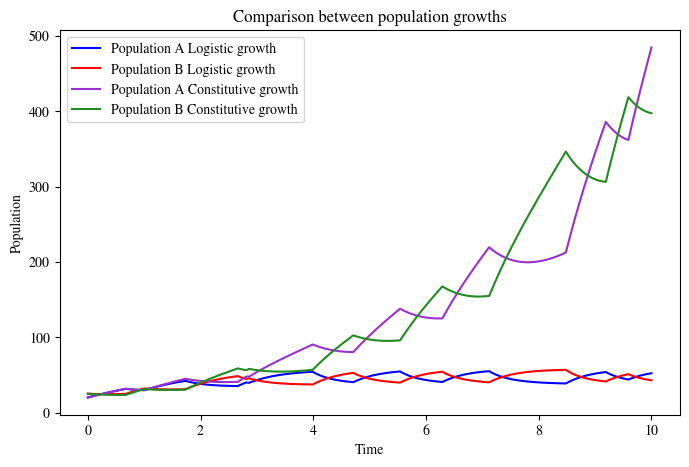

In [ ]:
plot_comparison_Logistic(t_eval, n_a_sto_adj, n_b_sto_adj, n_a_sto_log, n_b_sto_log)

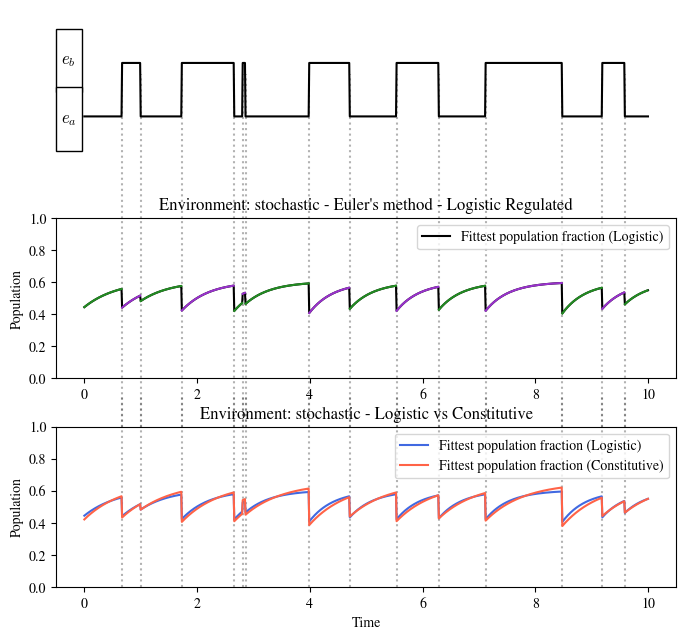

In [ ]:
plot_figure_logistic_compare(t_eval, t_state_stochastic, data_final_stochastic, data_fa_stochastic, data_fb_stochastic,
                                 data_final_stochastic_log, data_fa_stochastic_log, data_fb_stochastic_log)

## Our Proposal: Gillespie
Resum d perq és interessant

*(intenta adaptar nom de variables i reutilitzar funcions, potser com  has de plotejar std no pots per la dels plots, pero almenys la del temps environment_state i tal si)*

In [ ]:
# import and install the necessary libraries
!pip install gillespy2 > /dev/null #delete the outputs from the pip install

import gillespy2 as gillespy
import numpy as np
import matplotlib.pyplot as plt


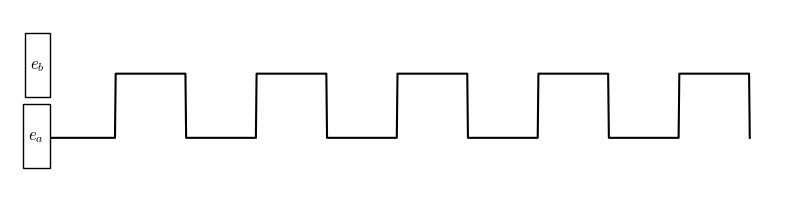

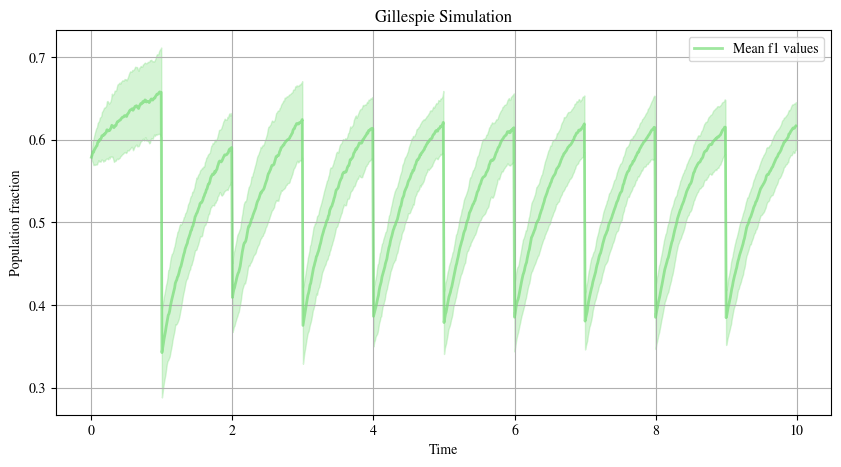

In [ ]:
# periodic Gillespie

# Paràmetres per a canviar l'entorn
T_periodic = 1  # Temps en cada estat per a l'entorn periòdic

# Duració total de la simulació
t_end = 10

t_eval = np.arange(0, t_end + 1e-4, 0.01).round(2)


environment_type = 'periodic'

def enviroment_state(t):
  if environment_type == 'periodic':
      state = (t // T_periodic) % 2
  elif environment_type == 'stochastic':
      # Generar temps aleatoris amb una mitjana T_mean i una desviació estàndard T_std
      # Implementem la lògica per a generar canvis d'estat amb una mitjana T_mean i una
      # desviació estàndard T_std
      global periods
      if not periods: #Initialize the values for the different periods
          periods.append(0)
          while sum(periods) < t_end:
              periods.append(np.abs(np.random.normal(T_mean, T_std)))

      cum_periods = np.cumsum(periods)

      if type(t) != np.ndarray:
          state = (np.where(cum_periods>t)[0][0] + 1) % 2
          return state
      else:
          t_states = np.zeros_like(t_eval)
          for i in range(2,len(cum_periods),2):
              start = np.where(t_eval == cum_periods[i-1].round(2))[0][0]
              if i == len(cum_periods)-1:
                  end = len(t_eval)
              else:
                  end =  np.where(t_eval == cum_periods[i].round(2))[0][0]
              t_states[start:end] = 1
          return t_states
  return state


plt.figure(figsize=(10, 2.5))
t_states = enviroment_state(t_eval)

nl = '\n'
plt.text(-0.01, 1.55, f"{nl}$e_b${nl}", bbox=dict(boxstyle="square", fc="w", ec="k"),
        size="large",
        horizontalalignment="right", verticalalignment="top")
plt.text(-0.01, .45, f"{nl}$e_a ${nl}", bbox=dict(boxstyle="square", fc="w", ec="k"),
        size="large",
        horizontalalignment="right", verticalalignment="top")
plt.plot(t_eval, t_states, color="k")
plt.ylim([-1,2])
plt.box(False)
plt.yticks([])
plt.xticks([])
plt.show()

# Find the intervals' duration
def calculate_intervals(states, times):
    intervals = []
    current_state = states[0]
    start_time = times[0]

    for i in range(1, len(states)):
        if states[i] != current_state:
            end_time = times[i - 1]
            intervals.append(end_time - start_time)
            current_state = states[i]
            start_time = times[i]

    # Add the last interval
    intervals.append(times[-1] - start_time)
    return np.array(intervals)

intervals = calculate_intervals(t_states, t_eval)


# Stochastic SIS model class using GillesPy2
class Gillespie_Model(gillespy.Model):
    def __init__(self, k_0, k_1, gamma_0, gamma_1, C0_0, C1_0, t_max):
        super().__init__(name="Gillespie Model")

        # Species: C0 (unfit), C1 (fit)
        self.add_species(gillespy.Species(name="C0", initial_value=int(C0_0)))
        self.add_species(gillespy.Species(name="C1", initial_value=int(C1_0)))

        # Parameters:
        self.add_parameter(gillespy.Parameter(name="k_0", expression=f"{k_0}"))
        self.add_parameter(gillespy.Parameter(name="k_1", expression=f"{k_1}"))
        self.add_parameter(gillespy.Parameter(name="gamma_0", expression=f"{gamma_0}"))
        self.add_parameter(gillespy.Parameter(name="gamma_1", expression=f"{gamma_1}"))



        # Reactions:
        growth_0 = gillespy.Reaction(
            name="growth_0",
            rate="gamma_0",
            reactants={"C0": 1},
            products={"C0": 2},
        )

        growth_1 = gillespy.Reaction(
            name="growth_1",
            rate="gamma_1",
            reactants={"C1": 1},
            products={"C1": 2},
        )

        switch_01 = gillespy.Reaction(
            name="switch_01",
            rate="k_1",
            reactants={"C0": 1},
            products={"C1": 1},
        )

        switch_10 = gillespy.Reaction(
            name="switch_10",
            rate="k_0",
            reactants={"C1": 1},
            products={"C0": 1},
        )

        self.add_reaction([growth_0, growth_1, switch_01, switch_10])

        # Time steps for simulation
        self.timespan(np.arange(0, t_max + 1e-4, 0.01))

# Simulations
def Gillespie_simulator(k_0, k_1, gamma_0, gamma_1, C0_0, C1_0, t_simulation, t_intervals, t_eval, num_runs=10):

  # Store results for multiple runs
  all_f1 = np.zeros((num_runs, t_simulation*100))
  all_C0 = np.zeros((num_runs, t_simulation*100))
  all_C1 = np.zeros((num_runs, t_simulation*100))

  for run in range(num_runs):

    C0_run = []
    C1_run = []
    f1_run = []

    # Create Gillespie simulation with GillesPy2 for first interval
    g_model = Gillespie_Model(k_0, k_1, gamma_0, gamma_1, C0_0, C1_0, t_intervals[0])

    # Run Gillespie stochastic simulation
    results = g_model.run()

    C0_run.extend(results['C0'])
    C1_run.extend(results['C1'])
    f1_run.extend(results['C1'] / (results['C0'] + results['C1']))

    # Create Gillespie simulation with GillesPy2 for the following intervals
    for i in range(1, len(t_intervals)-1):
      g_model = Gillespie_Model(k_0, k_1, gamma_0, gamma_1, C1_run[-1], C0_run[-1], t_intervals[i])
      results = g_model.run()
      C0_run.extend(results['C0'])
      C1_run.extend(results['C1'])
      f1_run.extend(results['C1'] / (results['C0'] + results['C1']))

    # Store results for the run
    all_C0[run, :] = C0_run
    all_C1[run, :] = C1_run
    all_f1[run, :] = f1_run

  # Calculate the standard deviation
  std_f1_values = np.std(all_f1, axis=0)
  mean_f1_values = np.mean(all_f1, axis=0)

  t = t_eval
  plt.figure(figsize=(10, 5))
  plt.plot(t[:-1], mean_f1_values, color='#77dd77', alpha=0.7, linewidth=2, label='Mean f1 values')  # Soft green
  plt.fill_between(t[:-1], (mean_f1_values - std_f1_values), (mean_f1_values + std_f1_values), color='#77dd77', alpha=0.3)
  plt.xlabel('Time')
  plt.ylabel('Population fraction')
  plt.title(f'Gillespie Simulation')
  plt.legend()
  plt.grid()
  plt.show()

  return ([t, mean_f1_values, std_f1_values])


# Parameters for analysis
k_0 = 0.5
k_1 = 1
gamma_0 = 0.05
gamma_1 = 0.15
C0_0 = 40
C1_0 = 55
t_simulation = t_end
num_runs = 50

# Run the analysis
[t, mean, std] = Gillespie_simulator(k_0, k_1, gamma_0, gamma_1, C0_0, C1_0, t_simulation, intervals, t_eval, num_runs)


In [ ]:
def plot_figure_2(t_eval, data_mean_f1, data_std_f1, t_state, original, title=None, show=True):
  changes = np.abs(np.diff(t_state))
  changes_index = np.where(changes == 1)[0] + 1
  changes_index = np.concatenate(([0],changes_index))

  fig, ax = plt.subplots(3, 1, figsize=(8, 7.5))
  plt.subplot(3, 1, 1)
  nl = '\n'
  plt.text(-0.13, 1.55, f"{nl}$e_b$ {nl}", bbox=dict(boxstyle="square", fc="w", ec="k"),
           size="large",
           horizontalalignment="right", verticalalignment="top")
  plt.text(-0.13, .45, f"{nl}$e_a${nl}", bbox=dict(boxstyle="square", fc="w", ec="k"),
           size="large",
           horizontalalignment="right", verticalalignment="top")
  plt.plot(t_eval, t_state, color="k")

  plt.ylim([-1, 2])
  plt.box(False)
  plt.yticks([])
  plt.xticks([])
  for i,_ in enumerate(changes_index):
    if i > 0:
      plt.axvline(x=t_eval[changes_index[i]], ymin=-1.2, ymax=0.6, c="k", linestyle=":", alpha=0.3, zorder=-10, clip_on=False)


  plt.subplot(3, 1, 2)
  plt.plot(t_eval[:-1], data_mean_f1, label="Fittest population fraction", color="k")
  plt.fill_between(t_eval[:-1], (data_mean_f1 - data_std_f1), (data_mean_f1 + data_std_f1), color='k', alpha=0.3)
  plt.ylabel("Population")
  plt.legend()
  for i,_ in enumerate(changes_index):
    if i > 0:
      # plt.vlines(x=t_eval[changes_index[i]], ymin=0, ymax=1, color="k", linestyle=":")
      plt.axvline(x=t_eval[changes_index[i]], ymin=-1.2, ymax=1, c="k", linestyle=":", alpha=0.3, zorder=-10, clip_on=False)
    if _<changes_index[-1]:
      if i % 2 == 0:
        plt.plot(t_eval[changes_index[i]+1:changes_index[i+1]], data_mean_f1[changes_index[i]+1:changes_index[i+1]], color="forestgreen")
        plt.fill_between(t_eval[changes_index[i]+1:changes_index[i+1]], (data_mean_f1[changes_index[i]+1:changes_index[i+1]] - data_std_f1[changes_index[i]+1:changes_index[i+1]]), (data_mean_f1[changes_index[i]+1:changes_index[i+1]] + data_std_f1[changes_index[i]+1:changes_index[i+1]]), color='forestgreen', alpha=0.3)

      else:
        plt.plot(t_eval[changes_index[i]+1:changes_index[i+1]], data_mean_f1[changes_index[i]+1:changes_index[i+1]], color="darkorchid")
        plt.fill_between(t_eval[changes_index[i]+1:changes_index[i+1]], (data_mean_f1[changes_index[i]+1:changes_index[i+1]] - data_std_f1[changes_index[i]+1:changes_index[i+1]]), (data_mean_f1[changes_index[i]+1:changes_index[i+1]] + data_std_f1[changes_index[i]+1:changes_index[i+1]]), color='darkorchid', alpha=0.3)

    else: # Last iteration
      if i % 2 == 0:
        plt.plot(t_eval[changes_index[-1]:len(t_eval)-1], data_mean_f1[changes_index[-1]:len(t_eval)-1], color="forestgreen")
        plt.fill_between(t_eval[changes_index[-1]:len(t_eval)-1], (data_mean_f1[changes_index[-1]:len(t_eval)-1] - data_std_f1[changes_index[-1]:len(t_eval)-1]), (data_mean_f1[changes_index[-1]:len(t_eval)-1] + data_std_f1[changes_index[-1]:len(t_eval)-1]), color='forestgreen', alpha=0.3)

      else:
        plt.plot(t_eval[changes_index[-1]:len(t_eval)-1], data_mean_f1[changes_index[-1]:len(t_eval)-1], color="darkorchid")
        plt.fill_between(t_eval[changes_index[-1]:len(t_eval)-1], (data_mean_f1[changes_index[-1]:len(t_eval)-1] - data_std_f1[changes_index[-1]:len(t_eval)-1]), (data_mean_f1[changes_index[-1]:len(t_eval)-1] + data_std_f1[changes_index[-1]:len(t_eval)-1]), color='darkorchid', alpha=0.3)

  plt.title(f"Environment: {environment_type} - Gillespie Algorithm")
  plt.ylim([0, 1])

  for i,_ in enumerate(changes_index):
    if i > 0:
      plt.axvline(x=t_eval[changes_index[i]], ymin=0, ymax=1.2, c="k", linestyle=":", alpha=0.3, zorder=-10, clip_on=False)

  plt.suptitle(title, y=0.875)

  plt.subplot(3, 1, 3)
  plt.plot(t_eval[:-1], data_mean_f1, label="Fittest population fraction (Gillespie)", color="royalblue")
  plt.fill_between(t_eval[:-1], (data_mean_f1 - data_std_f1), (data_mean_f1 + data_std_f1), color='royalblue', alpha=0.3)
  plt.plot(t_eval[:-1], original[:-1], label="Fittest population fraction (Original)", color="tomato", linestyle="-")
  plt.ylabel("Population")
  plt.xlabel("Time")
  plt.legend()
  for i,_ in enumerate(changes_index):
    if i > 0:
      plt.axvline(x=t_eval[changes_index[i]], ymin=0, ymax=1.2, c="k", linestyle=":", alpha=0.3, zorder=-10, clip_on=False)
    # if _<changes_index[-1]:
    #   if i % 2 == 0:
    #     plt.plot(t_eval[changes_index[i]:changes_index[i+1]], data_fa_log[changes_index[i]:changes_index[i+1]], color="forestgreen")
    #     plt.plot(t_eval[changes_index[i]:changes_index[i+1]], data_fa[changes_index[i]:changes_index[i+1]], color="forestgreen", linestyle="--")
    #   else:
    #     plt.plot(t_eval[changes_index[i]:changes_index[i+1]], data_fb_log[changes_index[i]:changes_index[i+1]], color="darkorchid")
    #     plt.plot(t_eval[changes_index[i]:changes_index[i+1]], data_fb[changes_index[i]:changes_index[i+1]], color="darkorchid", linestyle="--")
    # else: # Last iteration
    #   if i % 2 == 0:
    #     plt.plot(t_eval[changes_index[-1]:len(t_eval)-1], data_fa_log[changes_index[-1]:len(t_eval)-1], color="forestgreen")
    #     plt.plot(t_eval[changes_index[-1]:len(t_eval)-1], data_fa[changes_index[-1]:len(t_eval)-1], color="forestgreen", linestyle="--")
    #   else:
    #     plt.plot(t_eval[changes_index[-1]:len(t_eval)-1], data_fb_log[changes_index[-1]:len(t_eval)-1], color="darkorchid")
    #     plt.plot(t_eval[changes_index[-1]:len(t_eval)-1], data_fb[changes_index[-1]:len(t_eval)-1], color="darkorchid", linestyle="--")
  plt.title(f"Environment: {environment_type} - Gillespie vs Original")
  plt.ylim([0, 1])
  plt.subplots_adjust(hspace=0.3)

  if show:
    plt.show()
  else:
    return fig

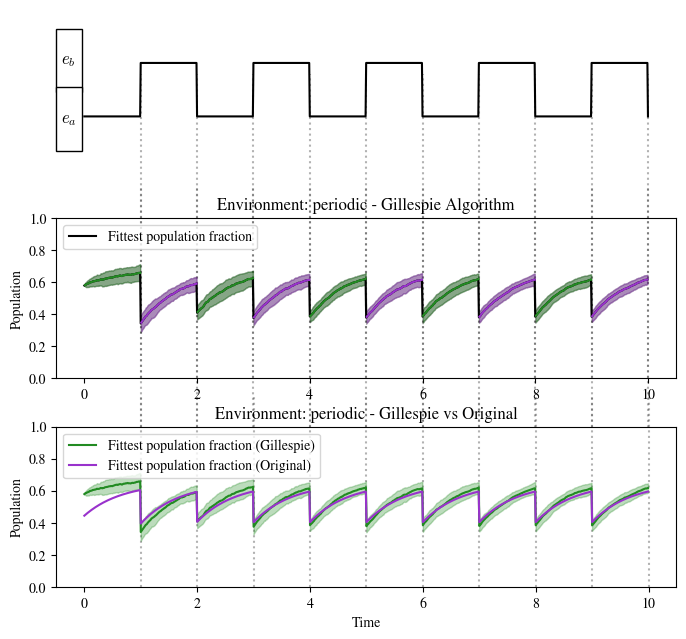

In [ ]:
#Plot Gillespies Periodic
plot_figure_2(t_eval, mean, std, t_states, data_final_periodic_adj)

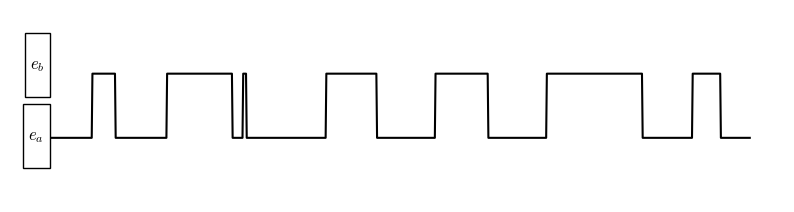

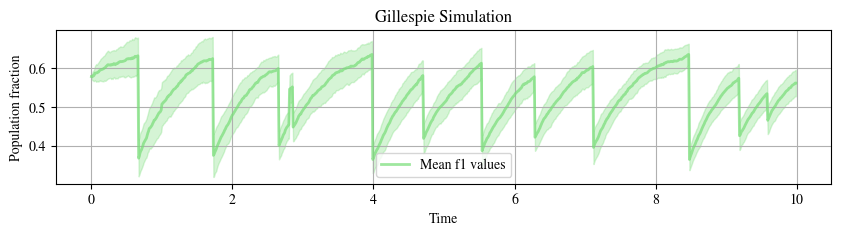

In [ ]:
import gillespy2 as gillespy
import numpy as np
import matplotlib.pyplot as plt


# Paràmetres per a canviar l'entorn
T_periodic = 1
T_mean = 1  # Mitjana del temps en cada estat per a l'entorn estocàstic
T_std = 0.8  # Desviació estàndard del temps en cada estat
periods = [] # Inicialitzar els periodes

# Duració total de la simulació
t_end = 10

t_eval = np.arange(0, t_end + 1e-4, 0.01).round(2)

environment_type = 'stochastic'


plt.figure(figsize=(10, 2.5))
t_states = t_state_stochastic


nl = '\n'
plt.text(-0.01, 1.55, f"{nl}$e_b${nl}", bbox=dict(boxstyle="square", fc="w", ec="k"),
        size="large",
        horizontalalignment="right", verticalalignment="top")
plt.text(-0.01, .45, f"{nl}$e_a ${nl}", bbox=dict(boxstyle="square", fc="w", ec="k"),
        size="large",
        horizontalalignment="right", verticalalignment="top")
plt.plot(t_eval, t_states, color="k")
plt.ylim([-1,2])
plt.box(False)
plt.yticks([])
plt.xticks([])
plt.show()

# Find the intervals' duration
def calculate_intervals(states, times):
    intervals = []
    current_state = states[0]
    start_time = times[0]

    for i in range(1, len(states)):
        if states[i] != current_state:
            end_time = times[i - 1]
            intervals.append(end_time - start_time)
            current_state = states[i]
            start_time = times[i]

    # Add the last interval
    intervals.append(times[-1] - start_time)
    return np.array(intervals)

intervals = calculate_intervals(t_states, t_eval)


# Stochastic SIS model class using GillesPy2
class Gillespie_Model(gillespy.Model):
    def __init__(self, k_0, k_1, gamma_0, gamma_1, C0_0, C1_0, t_max):
        super().__init__(name="Gillespie Model")

        # Species: C0 (unfit), C1 (fit)
        self.add_species(gillespy.Species(name="C0", initial_value=int(C0_0)))
        self.add_species(gillespy.Species(name="C1", initial_value=int(C1_0)))

        # Parameters:
        self.add_parameter(gillespy.Parameter(name="k_0", expression=f"{k_0}"))
        self.add_parameter(gillespy.Parameter(name="k_1", expression=f"{k_1}"))
        self.add_parameter(gillespy.Parameter(name="gamma_0", expression=f"{gamma_0}"))
        self.add_parameter(gillespy.Parameter(name="gamma_1", expression=f"{gamma_1}"))



        # Reactions:
        growth_0 = gillespy.Reaction(
            name="growth_0",
            rate="gamma_0",
            reactants={"C0": 1},
            products={"C0": 2},
        )

        growth_1 = gillespy.Reaction(
            name="growth_1",
            rate="gamma_1",
            reactants={"C1": 1},
            products={"C1": 2},
        )

        switch_01 = gillespy.Reaction(
            name="switch_01",
            rate="k_1",
            reactants={"C0": 1},
            products={"C1": 1},
        )

        switch_10 = gillespy.Reaction(
            name="switch_10",
            rate="k_0",
            reactants={"C1": 1},
            products={"C0": 1},
        )

        self.add_reaction([growth_0, growth_1, switch_01, switch_10])

        # Time steps for simulation
        self.timespan(np.arange(0, t_max + 1e-3, 0.01))

# Simulations
def Gillespie_simulator(k_0, k_1, gamma_0, gamma_1, C0_0, C1_0, t_simulation, t_intervals, t_eval, num_runs=10):

  # Store results for multiple runs
  all_f1 = np.zeros((num_runs, t_simulation*100))
  all_C0 = np.zeros((num_runs, t_simulation*100))
  all_C1 = np.zeros((num_runs, t_simulation*100))

  for run in range(num_runs):

    C0_run = []
    C1_run = []
    f1_run = []

    # Create Gillespie simulation with GillesPy2 for first interval
    g_model = Gillespie_Model(k_0, k_1, gamma_0, gamma_1, C0_0, C1_0, t_intervals[0])

    # Run Gillespie stochastic simulation
    results = g_model.run()

    C0_run.extend(results['C0'])
    C1_run.extend(results['C1'])
    f1_run.extend(results['C1'] / (results['C0'] + results['C1']))

    # Create Gillespie simulation with GillesPy2 for the following intervals
    for i in range(1, len(t_intervals)):
      g_model = Gillespie_Model(k_0, k_1, gamma_0, gamma_1, C1_run[-1], C0_run[-1], t_intervals[i])
      results = g_model.run()
      C0_run.extend(results['C0'])
      C1_run.extend(results['C1'])
      f1_run.extend(results['C1'] / (results['C0'] + results['C1']))

    # Store results for the run
    all_C0[run, :] = C0_run[:-1]
    all_C1[run, :] = C1_run[:-1]
    all_f1[run, :] = f1_run[:-1]

  # Calculate the standard deviation
  std_f1_values = np.std(all_f1, axis=0)
  mean_f1_values = np.mean(all_f1, axis=0)

  t = t_eval
  plt.figure(figsize=(10, 2))
  plt.plot(t[:-1], mean_f1_values, color='#77dd77', alpha=0.7, linewidth=2, label='Mean f1 values')  # Soft green
  plt.fill_between(t[:-1], (mean_f1_values - std_f1_values), (mean_f1_values + std_f1_values), color='#77dd77', alpha=0.3)
  plt.xlabel('Time')
  plt.ylabel('Population fraction')
  plt.title(f'Gillespie Simulation')
  plt.legend()
  plt.grid()
  plt.show()

  return ([t, mean_f1_values, std_f1_values])


# Parameters for analysis
k_0 = 0.5
k_1 = 1
gamma_0 = 0.05
gamma_1 = 0.15
C0_0 = 40
C1_0 = 55
t_simulation = t_end
num_runs = 50

# Run the analysis
[t, mean, std] = Gillespie_simulator(k_0, k_1, gamma_0, gamma_1, C0_0, C1_0, t_simulation, intervals, t_eval, num_runs)

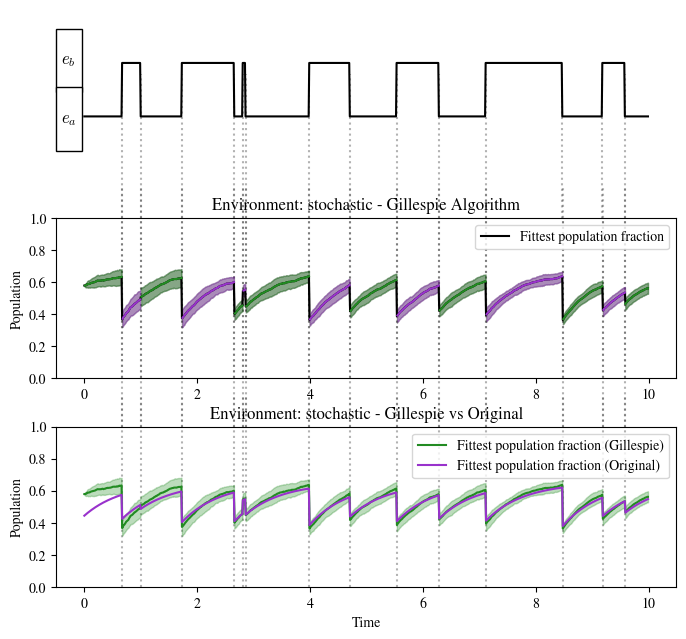

In [ ]:
#Plot Gillespies Periodic
plot_figure_2(t_eval, mean, std, t_states, data_final_stochastic_adj)

## Our Proposal: Agent Based Modeling
Explicar perq està guapo

In [ ]:
# import and install the necessary libraries
!pip install -U mesa[rec] > /dev/null #delete the outputs from the pip install

import mesa
from mesa.experimental.devs import ABMSimulator
from mesa.datacollection import DataCollector

In [ ]:
class BacteriaAgent(mesa.Agent):
    """An agent representing a bacteria of type A or B."""

    def __init__(self, model, bacterial_type):
        super().__init__(model)
        self.type = bacterial_type.upper()  # 'A' or 'B'
        self.k1 = np.random.normal(0.15, 0.05)
        self.k0 = np.random.normal(0.0725, 0.05)
        self.gamma1 = np.random.normal(0.06, 0.01)
        self.gamma0 = np.random.normal(0.02, 0.01)

    def debugg(self):
        """Prints the agent's type and parameters."""
        nl = "\n"
        print(f"Agent type: {self.type} {nl} Parameters: {nl}k0: {self.k0} {nl}k1: {self.k1} {nl}gamma0: {self.gamma0} {nl}gamma1: {self.gamma1}")

    def replicate(self):
        """Replicates the agent based on environmental fitness."""
        probability = (
            self.gamma0 if self.type == self.model.fittest_environment else self.gamma1
        )
        if self.random.random() < probability:
            self.__class__(self.model, self.type) #Create a new bacteria of the same type (with randomized parameters)

    def adapt_environment(self):
        """Switches the agent's type based on environmental conditions."""
        probability = self.k0 if self.type == self.model.fittest_environment else self.k1
        if self.random.random() < probability:
            self.type = 'B' if self.type == 'A' else 'A'

    def step(self):
        """Schedule the next steps for replication and environment adaptation."""
        self.replicate()
        self.adapt_environment()


In [ ]:
class BacteriaModel(mesa.Model):
    """A model simulating bacteria competition and adaptation."""

    def __init__(self, n_A, n_B, seed=None, simulator: ABMSimulator = None):
        super().__init__(seed=seed)
        np.random.seed(seed)

        # Set up the simulator
        self.simulator = simulator or ABMSimulator()
        self.simulator.setup(self)

        self.fittest_environment = 'A'  # Initial fittest environment

        # Create agents of type A
        for _ in range(n_A):
            BacteriaAgent(self, 'A')

        # Create agents of type B
        for _ in range(n_B):
            BacteriaAgent(self, 'B')

        # Set up data collection
        model_reporters = {
            "Number of agents": lambda m: len(m.agents),
            "Fittest environment": lambda m: m.fittest_environment,
            "Number of agents of type A": lambda m: len([a for a in m.agents if a.type == 'A']),
            "Number of agents of type B": lambda m: len([a for a in m.agents if a.type == 'B']),
            "f1":lambda m:((len([a for a in m.agents if a.type == 'A']) / len(m.agents)) if m.fittest_environment == 'A' else (len([a for a in m.agents if a.type == 'B']) / len(m.agents)))
        }

        self.datacollector = DataCollector(model_reporters)

        # Collect initial data
        self.running = True
        self.datacollector.collect(self)

    def switch_environment(self, state):
        """Switch the fittest environment."""
        self.fittest_environment = state
        # print(f"Switched environment to {self.fittest_environment}")

    def step(self):
        """Advance the simulation by one step."""
        self.agents.shuffle_do("step")

        # Collect data
        self.datacollector.collect(self)


In [ ]:
environment_type = 'periodic'

simulator = ABMSimulator()
model = BacteriaModel(40, 55 , simulator=simulator, seed=22)

step_size_abm = 0.05 # Choose how much time is expected to elapse between steps

n_steps = int(t_end / step_size_abm)

# Run the model for n_steps steps
for i in range(n_steps):
    # print(f"Step {i+1}, Fittest Environment: {model.fittest_environment}")
    if environment_state(i * step_size_abm):
        model.switch_environment("B")
    else:
        model.switch_environment("A")
    model.step()

results_periodic = model.datacollector.get_model_vars_dataframe()

# Add a column to represent time
results_periodic['Time'] = results_periodic.index * step_size_abm

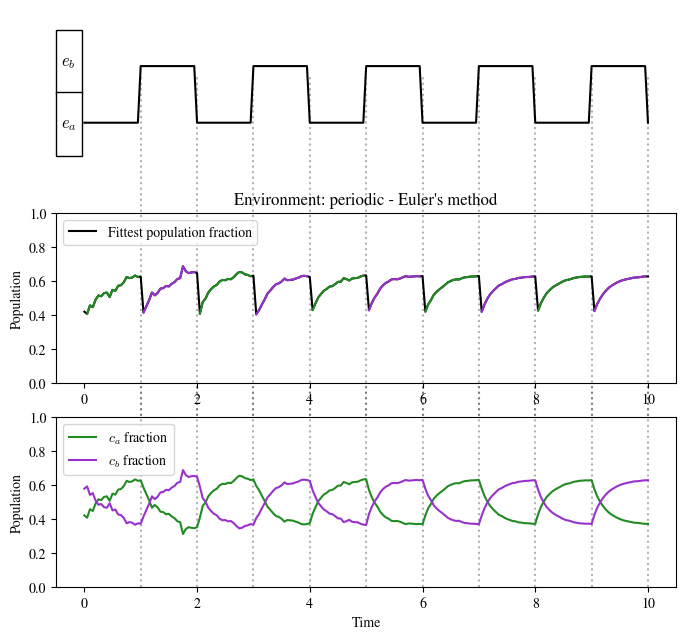

In [ ]:
t_eval_abm = np.arange(0, t_end + step_size_abm, step_size_abm)
t_state_periodic_abm = environment_state(t_eval_abm, step_size_abm)

plot_figure(t_eval_abm, results_periodic["f1"], t_state_periodic_abm, results_periodic["Number of agents of type A"]/results_periodic["Number of agents"], results_periodic['Number of agents of type B']/results_periodic["Number of agents"])

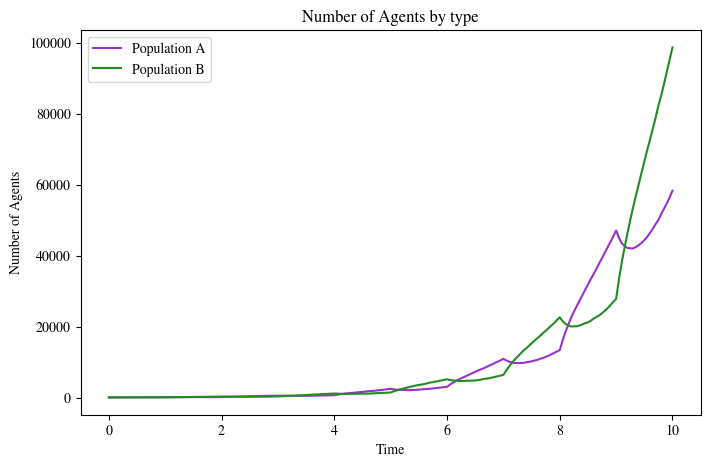

In [ ]:
# Plot number of agents type A and B
def plot_number_of_agents(results):
  plt.figure(figsize=(8,5))
  plt.plot(results['Time'], results["Number of agents of type A"], label="Population A",color="darkorchid")
  plt.plot(results['Time'], results['Number of agents of type B'], label="Population B",color="forestgreen")
  plt.legend()
  plt.xlabel('Time')
  plt.ylabel('Number of Agents')
  plt.title('Number of Agents by type')
  plt.show()

plot_number_of_agents(results_periodic)

In [ ]:
environment_type = 'stochastic'

simulator = ABMSimulator()
model = BacteriaModel(40, 55 , simulator=simulator, seed=22)

# Run the model for n_steps steps
for i in range(n_steps):
    # print(f"Step {i+1}, Fittest Environment: {model.fittest_environment}")
    if environment_state(i * step_size_abm):
        model.switch_environment("B")
    else:
        model.switch_environment("A")
    model.step()

results_stochastic = model.datacollector.get_model_vars_dataframe()

# Add a column to represent time
results_stochastic['Time'] = results_stochastic.index * step_size_abm

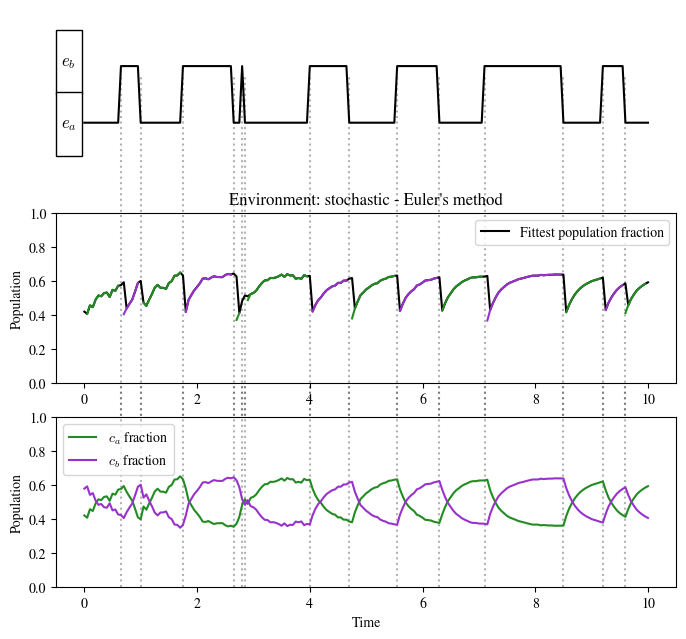

In [ ]:
t_state_stochastic_abm = environment_state(t_eval_abm, step_size_abm)

plot_figure(t_eval_abm, results_stochastic["f1"], t_state_stochastic_abm, results_stochastic["Number of agents of type A"]/results_stochastic["Number of agents"], results_stochastic['Number of agents of type B']/results_stochastic["Number of agents"])

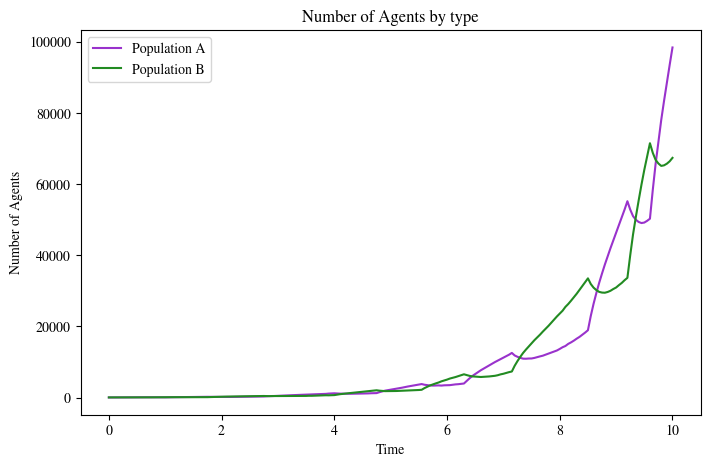

In [ ]:
plot_number_of_agents(results_stochastic)

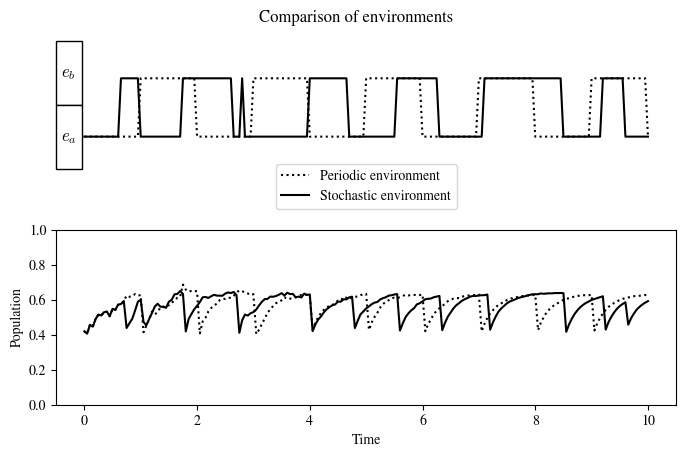

In [ ]:
# plot_comparison(t_eval_abm, result, t_state_periodic, data_final_stochastic, t_state_stochastic)
plot_comparison(t_eval_abm, results_periodic["f1"], t_state_periodic_abm, results_stochastic["f1"], t_state_stochastic_abm)